<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh.csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [159]:
# Show dataset
# split data into training and test datasets
# will implement the sklearn method here instead of manually splitting just need to ensure is 50/50 before linear model
trainingSet = df[0:284]
testSet = df[285:570]
xDiagnosis = trainingSet['Diagnosis']
yDiagnnosis = testSet['Diagnosis']
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)
X = trainingSet
y = testSet
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)



Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [160]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
188         B       11.810  ...          0.3200                  0.06576
34          M       16.130  ...          0.4270                  0.12330
65          M       14.780  ...          0.3321                  0.08911
107         B       12.360  ...          0.2983                  0.07185
181         M       21.090  ...          0.4098                  0.12840
..        ...          ...  ...             ...                      ...
149         B       13.740  ...          0.2350                  0.07014
241         B       12.420  ...          0.2901                  0.06783
140         B        9.738  ...          0.3105                  0.08151
205         M       15.120  ...          0.3415                  0.09740
279         B       13.850  ...          0.2955                  0.06912

[170 rows x 31 columns]
y_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
473     

In [161]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (114, 31)
y_test set shape:  (114, 31)
X_train shape:  (170, 31)
y_train shape:  (170, 31)


In [162]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

## Show standard deviation of diagnose between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

In [168]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Diagnosis                    0.501165
Mean_Radius                  3.849845
Mean_Texture                 4.003429
Mean_Perimeter              26.496938
Mean_Area                  388.399433
Mean_Smoothness              0.013220
Mean_Compactness             0.057137
Mean_Concavity               0.087780
Mean_Concave_Points          0.040999
Mean_Symmetry                0.029127
Mean_Fractal_Dimension       0.007616
Radius_SE                    0.315738
Texture_SE                   0.522939
Perimeter_SE                 2.370990
Area_SE                     52.030847
Smoothness_SE                0.003229
Compactness_SE               0.020437
Concavity_SE                 0.042185
Concave_Points_SE            0.006890
Symmetry_SE                  0.008433
Fractal_Dimension_SE         0.003267
Worst_Radius                 5.342240
Worst_Texture                6.124779
Worst_Perimeter             37.272609
Worst_Area                 631.129454
Wo

In [169]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  Diagnosis                    0.409766
Mean_Radius                  2.944162
Mean_Texture                 4.183935
Mean_Perimeter              20.284750
Mean_Area                  269.928344
Mean_Smoothness              0.014052
Mean_Compactness             0.045877
Mean_Concavity               0.068714
Mean_Concave_Points          0.033189
Mean_Symmetry                0.022692
Mean_Fractal_Dimension       0.006773
Radius_SE                    0.211020
Texture_SE                   0.562377
Perimeter_SE                 1.476365
Area_SE                     28.055427
Smoothness_SE                0.003132
Compactness_SE               0.014805
Concavity_SE                 0.022854
Concave_Points_SE            0.005794
Symmetry_SE                  0.007113
Fractal_Dimension_SE         0.002162
Worst_Radius                 3.843573
Worst_Texture                5.615334
Worst_Perimeter             26.607023
Worst_Area                 408.474171
Wo

In [171]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Diagnosis                    0.502208
Mean_Radius                  3.228272
Mean_Texture                 4.773777
Mean_Perimeter              22.332980
Mean_Area                  316.245538
Mean_Smoothness              0.014559
Mean_Compactness             0.056858
Mean_Concavity               0.076870
Mean_Concave_Points          0.037211
Mean_Symmetry                0.028958
Mean_Fractal_Dimension       0.007477
Radius_SE                    0.250407
Texture_SE                   0.581353
Perimeter_SE                 1.878923
Area_SE                     36.153300
Smoothness_SE                0.003112
Compactness_SE               0.018798
Concavity_SE                 0.023583
Concave_Points_SE            0.005734
Symmetry_SE                  0.010383
Fractal_Dimension_SE         0.002431
Worst_Radius                 4.377361
Worst_Texture                6.792848
Worst_Perimeter             30.145260
Worst_Area                 499.650419
Wor

In [170]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  Diagnosis                    0.446918
Mean_Radius                  3.915479
Mean_Texture                 4.454023
Mean_Perimeter              26.970190
Mean_Area                  415.264817
Mean_Smoothness              0.014041
Mean_Compactness             0.048779
Mean_Concavity               0.079593
Mean_Concave_Points          0.041579
Mean_Symmetry                0.027938
Mean_Fractal_Dimension       0.006195
Radius_SE                    0.314180
Texture_SE                   0.555012
Perimeter_SE                 2.219844
Area_SE                     60.512740
Smoothness_SE                0.002283
Compactness_SE               0.016872
Concavity_SE                 0.022412
Concave_Points_SE            0.005810
Symmetry_SE                  0.007239
Fractal_Dimension_SE         0.002476
Worst_Radius                 5.435318
Worst_Texture                6.259630
Worst_Perimeter             37.975627
Worst_Area                 694.740782
Wor

## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets

### Training Set Correlation values

In [165]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.738523,0.478047,0.747109,0.691157,0.305743,0.556884,0.576911,0.737387,0.237165,-0.131984,0.468625,-0.123382,0.467336,0.479629,-0.128609,0.211712,0.079577,0.298879,-0.127583,-0.034817,0.780344,0.523623,0.787982,0.722892,0.408074,0.559273,0.554936,0.788204,0.389868,0.277643
Mean_Radius,0.738523,1.000000,0.459618,0.997804,0.986556,0.110301,0.490842,0.613910,0.812014,0.088829,-0.373980,0.669222,-0.077476,0.676373,0.730342,-0.182484,0.168891,0.061462,0.292662,-0.111537,-0.109052,0.963699,0.433014,0.958030,0.938445,0.080424,0.403691,0.446104,0.726480,0.134651,-0.009086
Mean_Texture,0.478047,0.459618,1.000000,0.463227,0.436679,-0.006651,0.291005,0.299895,0.355953,0.042768,-0.169559,0.191884,0.199226,0.208989,0.224153,-0.089187,0.172391,0.063836,0.128609,-0.147338,-0.052219,0.484480,0.912046,0.489914,0.471069,0.114915,0.352439,0.329424,0.391028,0.129722,0.106006
Mean_Perimeter,0.747109,0.997804,0.463227,1.000000,0.985098,0.146940,0.543073,0.654336,0.842029,0.122853,-0.324433,0.681534,-0.070714,0.693613,0.738173,-0.166118,0.211562,0.088826,0.321548,-0.099457,-0.076051,0.963763,0.435312,0.963808,0.938312,0.110265,0.446308,0.483399,0.755183,0.155797,0.034521
Mean_Area,0.691157,0.986556,0.436679,0.985098,1.000000,0.121044,0.471035,0.619524,0.805017,0.076992,-0.346427,0.717787,-0.040146,0.724545,0.789334,-0.130926,0.167047,0.078353,0.283082,-0.069658,-0.084336,0.945465,0.401992,0.939501,0.942216,0.076753,0.362376,0.423047,0.687627,0.090042,-0.024633
Mean_Smoothness,0.305743,0.110301,-0.006651,0.146940,0.121044,1.000000,0.599728,0.503489,0.522653,0.548648,0.532034,0.302594,0.030588,0.289001,0.238099,0.295973,0.314047,0.211302,0.343639,0.163358,0.266840,0.158887,0.021782,0.185927,0.154929,0.762687,0.423907,0.406965,0.451844,0.337488,0.478632
Mean_Compactness,0.556884,0.490842,0.291005,0.543073,0.471035,0.599728,1.000000,0.866437,0.830692,0.582601,0.514349,0.481173,0.032693,0.522681,0.429599,0.085440,0.725085,0.443896,0.585557,0.141819,0.444286,0.524372,0.292460,0.584382,0.493726,0.499627,0.863716,0.790964,0.820635,0.480732,0.677699
Mean_Concavity,0.576911,0.613910,0.299895,0.654336,0.619524,0.503489,0.866437,1.000000,0.888816,0.484307,0.362423,0.604687,0.115304,0.618415,0.571111,0.114563,0.678426,0.657049,0.698561,0.154095,0.477854,0.615168,0.285839,0.657134,0.601677,0.401633,0.703442,0.861424,0.828861,0.356561,0.516037
Mean_Concave_Points,0.737387,0.812014,0.355953,0.842029,0.805017,0.522653,0.830692,0.888816,1.000000,0.433135,0.117727,0.688112,0.009852,0.700917,0.674967,0.016025,0.446070,0.311311,0.556224,0.035388,0.192032,0.815389,0.344335,0.844411,0.791902,0.413194,0.647691,0.694067,0.904255,0.328170,0.348426
Mean_Symmetry,0.237165,0.088829,0.042768,0.122853,0.076992,0.548648,0.582601,0.484307,0.433135,1.000000,0.504432,0.263188,0.128919,0.253823,0.162070,0.008704,0.399825,0.300941,0.347866,0.389892,0.342879,0.135506,0.080693,0.171670,0.117826,0.359702,0.454380,0.426248,0.409494,0.677889,0.467425


In [135]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.753712,0.387309,0.762672,0.746781,0.344573,0.581143,0.756613,0.796829,0.234291,-0.041334,0.616887,0.086025,0.599904,0.564539,-0.094426,0.251152,0.371469,0.471066,-0.051519,0.058485,0.787600,0.469630,0.791147,0.750337,0.373692,0.581777,0.710639,0.799952,0.321086,0.258995
Mean_Radius,0.753712,1.000000,0.238883,0.998461,0.985212,0.209409,0.536809,0.755804,0.854726,0.058937,-0.318633,0.682249,-0.127404,0.673559,0.708651,-0.332741,0.168955,0.302298,0.443976,-0.172308,-0.062656,0.982609,0.275315,0.978267,0.944759,0.138315,0.450653,0.622378,0.797598,0.191447,-0.016975
Mean_Texture,0.387309,0.238883,1.000000,0.243353,0.253012,-0.006164,0.161875,0.274127,0.249036,0.114291,-0.111978,0.325199,0.479285,0.319179,0.275801,0.105203,0.188505,0.231516,0.255785,0.101413,0.056238,0.258045,0.905939,0.259123,0.257147,0.051458,0.157896,0.239878,0.232634,0.046549,-0.012433
Mean_Perimeter,0.762672,0.998461,0.243353,1.000000,0.986132,0.240191,0.578210,0.786567,0.875991,0.086346,-0.277302,0.693972,-0.120791,0.688282,0.718242,-0.314182,0.205764,0.335615,0.470027,-0.158134,-0.030307,0.982768,0.279120,0.981966,0.947087,0.164912,0.485747,0.652183,0.817622,0.207696,0.022882
Mean_Area,0.746781,0.985212,0.253012,0.986132,1.000000,0.220962,0.538093,0.774337,0.862795,0.093628,-0.287105,0.755767,-0.084087,0.750032,0.795096,-0.262968,0.187089,0.314212,0.446846,-0.147201,-0.041002,0.982590,0.280255,0.981304,0.977765,0.150553,0.442389,0.614705,0.783206,0.179416,-0.010351
Mean_Smoothness,0.344573,0.209409,-0.006164,0.240191,0.220962,1.000000,0.673181,0.491482,0.535216,0.491409,0.583076,0.253777,0.063551,0.262522,0.220857,0.280841,0.191101,0.204451,0.328083,0.081983,0.207413,0.243647,0.088613,0.272025,0.243426,0.846041,0.501254,0.445950,0.529308,0.381539,0.554745
Mean_Compactness,0.581143,0.536809,0.161875,0.578210,0.538093,0.673181,1.000000,0.860552,0.809992,0.479946,0.534521,0.478893,-0.000089,0.504662,0.437434,0.119711,0.675847,0.672540,0.669653,0.097225,0.482222,0.551839,0.208797,0.594312,0.532160,0.604074,0.871208,0.820786,0.806780,0.422582,0.689192
Mean_Concavity,0.756613,0.755804,0.274127,0.786567,0.774337,0.491482,0.860552,1.000000,0.940518,0.343202,0.207405,0.665668,0.027711,0.686726,0.650610,-0.005367,0.573009,0.708897,0.683942,0.041479,0.326073,0.770191,0.323211,0.801763,0.765269,0.440824,0.768352,0.903373,0.887016,0.341371,0.453040
Mean_Concave_Points,0.796829,0.854726,0.249036,0.875991,0.862795,0.535216,0.809992,0.940518,1.000000,0.324111,0.102046,0.705096,0.023705,0.710456,0.675467,-0.049526,0.423958,0.534226,0.658135,0.013357,0.206433,0.862813,0.305992,0.881078,0.843313,0.436086,0.664459,0.788207,0.922068,0.338454,0.327330
Mean_Symmetry,0.234291,0.058937,0.114291,0.086346,0.093628,0.491409,0.479946,0.343202,0.324111,1.000000,0.442077,0.262312,0.198175,0.267337,0.187311,0.322166,0.336580,0.282910,0.339774,0.403379,0.267465,0.098445,0.109590,0.123152,0.124341,0.371793,0.349218,0.275334,0.281581,0.668469,0.371668


### Test set correlation values

In [136]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.671210,0.431549,0.684208,0.611515,0.254636,0.584860,0.645239,0.694323,0.321045,-0.027891,0.399867,-0.076499,0.394893,0.394639,-0.069761,0.332983,0.405857,0.466650,0.001430,0.188215,0.727895,0.492567,0.737206,0.669553,0.444286,0.636339,0.739664,0.808518,0.489361,0.403727
Mean_Radius,0.671210,1.000000,0.294468,0.997456,0.984805,0.135352,0.498667,0.689848,0.789659,0.197570,-0.349397,0.675636,-0.047324,0.662330,0.723337,-0.031804,0.269549,0.362027,0.393425,-0.011254,0.089672,0.954552,0.276238,0.948894,0.939341,0.140711,0.411455,0.551754,0.714554,0.157864,0.002147
Mean_Texture,0.431549,0.294468,1.000000,0.295358,0.270419,-0.126733,0.154783,0.189813,0.174332,-0.018920,-0.216899,0.096636,0.199178,0.097037,0.105983,-0.126328,0.112844,0.126481,0.046980,-0.127150,-0.035219,0.333715,0.912486,0.328924,0.317723,0.091735,0.284966,0.299262,0.238091,0.108056,0.110076
Mean_Perimeter,0.684208,0.997456,0.295358,1.000000,0.983270,0.180087,0.554383,0.734007,0.825008,0.240298,-0.292595,0.696107,-0.032584,0.687106,0.738977,-0.000945,0.316912,0.405836,0.428900,0.016101,0.136821,0.954933,0.276847,0.956235,0.940593,0.176297,0.454524,0.588159,0.743659,0.186002,0.044881
Mean_Area,0.611515,0.984805,0.270419,0.983270,1.000000,0.152229,0.473772,0.687438,0.780370,0.170080,-0.325255,0.732705,0.002326,0.721041,0.791459,0.034368,0.261567,0.365159,0.365524,0.042552,0.102119,0.926095,0.236667,0.920287,0.934930,0.119305,0.356595,0.500772,0.659723,0.092618,-0.034154
Mean_Smoothness,0.254636,0.135352,-0.126733,0.180087,0.152229,1.000000,0.662787,0.606861,0.589381,0.561298,0.649191,0.368855,0.075979,0.364478,0.314654,0.522119,0.466489,0.479846,0.416505,0.356142,0.571970,0.161244,-0.081450,0.203970,0.166505,0.782332,0.442736,0.460315,0.473126,0.369409,0.496061
Mean_Compactness,0.584860,0.498667,0.154783,0.554383,0.473772,0.662787,1.000000,0.905713,0.859100,0.689792,0.544848,0.546628,0.091229,0.573504,0.492988,0.300298,0.784547,0.765179,0.700419,0.343367,0.671957,0.540578,0.176585,0.610049,0.521621,0.581230,0.849145,0.827503,0.815827,0.575600,0.633942
Mean_Concavity,0.645239,0.689848,0.189813,0.734007,0.687438,0.606861,0.905713,1.000000,0.954332,0.603491,0.327123,0.697536,0.134803,0.713344,0.676530,0.306639,0.674006,0.782523,0.663620,0.339435,0.521423,0.687669,0.193686,0.741727,0.678837,0.508145,0.718526,0.843267,0.841728,0.469586,0.437020
Mean_Concave_Points,0.694323,0.789659,0.174332,0.825008,0.780370,0.589381,0.859100,0.954332,1.000000,0.574768,0.207494,0.718183,0.055350,0.720037,0.697830,0.235943,0.560394,0.646037,0.656951,0.240666,0.442773,0.794557,0.181685,0.833531,0.783063,0.490966,0.658294,0.774186,0.892187,0.419380,0.362984
Mean_Symmetry,0.321045,0.197570,-0.018920,0.240298,0.170080,0.561298,0.689792,0.603491,0.574768,1.000000,0.507380,0.356294,0.187986,0.349126,0.263911,0.202463,0.575404,0.525256,0.518990,0.494429,0.599147,0.236090,0.017136,0.287425,0.210480,0.372371,0.523002,0.506849,0.515199,0.682047,0.456547


In [137]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.792369,0.319638,0.808595,0.804414,0.359553,0.611574,0.795569,0.851861,0.407115,-0.043794,0.658862,-0.025943,0.667342,0.720625,0.031517,0.322356,0.420759,0.468013,0.072675,0.143995,0.807077,0.277223,0.818455,0.794809,0.346460,0.524306,0.669207,0.771750,0.336145,0.224501
Mean_Radius,0.792369,1.000000,0.210497,0.998077,0.989787,0.227010,0.493781,0.685245,0.833834,0.229839,-0.316056,0.656381,-0.182629,0.657117,0.793094,-0.244926,0.195455,0.257863,0.377662,-0.204748,-0.048623,0.975857,0.132753,0.967651,0.947995,0.150314,0.437745,0.535426,0.750213,0.142191,0.023647
Mean_Texture,0.319638,0.210497,1.000000,0.220677,0.219369,-0.092138,0.188994,0.299450,0.238648,0.027109,-0.041325,0.298613,0.536403,0.321490,0.281000,0.154400,0.211127,0.209985,0.105289,0.151123,0.136714,0.234878,0.929090,0.256467,0.235573,-0.029174,0.242911,0.293462,0.211132,0.060798,0.115913
Mean_Perimeter,0.808595,0.998077,0.220677,1.000000,0.988639,0.258118,0.543588,0.725299,0.860996,0.264829,-0.269268,0.663654,-0.178579,0.675347,0.796507,-0.227825,0.243500,0.302038,0.413142,-0.186343,-0.006375,0.975573,0.142213,0.973795,0.947905,0.178253,0.483926,0.578601,0.781908,0.169505,0.072377
Mean_Area,0.804414,0.989787,0.219369,0.988639,1.000000,0.233325,0.499137,0.698231,0.848065,0.237051,-0.278802,0.714326,-0.169338,0.709582,0.846018,-0.201976,0.196328,0.260852,0.380247,-0.158606,-0.025021,0.981898,0.136317,0.973309,0.974034,0.160777,0.425124,0.527251,0.745742,0.152261,0.033426
Mean_Smoothness,0.359553,0.227010,-0.092138,0.258118,0.233325,1.000000,0.667110,0.490948,0.533866,0.564165,0.565678,0.357730,0.034895,0.347125,0.295936,0.394725,0.320790,0.346951,0.527393,0.205388,0.314040,0.253236,-0.081815,0.267221,0.250332,0.832718,0.380148,0.380522,0.475724,0.302487,0.401542
Mean_Compactness,0.611574,0.493781,0.188994,0.543588,0.499137,0.667110,1.000000,0.903762,0.823420,0.663348,0.574950,0.467029,-0.051469,0.590445,0.464892,0.150962,0.773327,0.746825,0.727141,0.135632,0.594825,0.511666,0.132551,0.584026,0.498940,0.553168,0.865389,0.850498,0.834614,0.441883,0.719403
Mean_Concavity,0.795569,0.685245,0.299450,0.725299,0.698231,0.490948,0.903762,1.000000,0.932945,0.587331,0.317246,0.576880,-0.013542,0.684655,0.622877,0.080048,0.706480,0.776574,0.720689,0.069263,0.478984,0.692601,0.235095,0.750401,0.685857,0.414869,0.810738,0.904213,0.901488,0.375892,0.556337
Mean_Concave_Points,0.851861,0.833834,0.238648,0.860996,0.848065,0.533866,0.823420,0.932945,1.000000,0.512249,0.150429,0.679203,-0.067316,0.728117,0.745191,0.017325,0.500832,0.565411,0.658985,-0.019384,0.291092,0.838963,0.180094,0.866719,0.831706,0.437437,0.678947,0.775048,0.921878,0.314163,0.376559
Mean_Symmetry,0.407115,0.229839,0.027109,0.264829,0.237051,0.564165,0.663348,0.587331,0.512249,1.000000,0.489177,0.272361,-0.011365,0.331114,0.225390,0.288077,0.483547,0.512999,0.512767,0.334331,0.382039,0.234915,0.002937,0.273105,0.225737,0.502045,0.515855,0.526477,0.490961,0.672204,0.462896


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the smoothness has a negative impact on the Area Severity.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  6.392172093385495e-06
Coefficient:  [[-5.13479671e-06]]
Intercept:  [0.00739456]
predict  [[0.00660688]]


(114, 31)

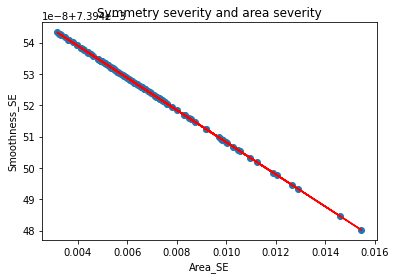

In [138]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Smoothness_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Smoothness_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Area_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Area_SE']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Area_SE")
plt.ylabel("Smoothness_SE")
plt.title('Symmetry severity and area severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.721777287164914e-05
Coefficient:  [[0.00811089]]
Intercept:  [0.01103734]


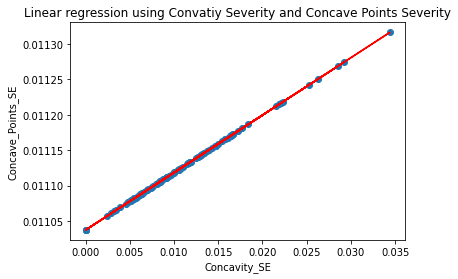

In [139]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')

# Examples of low and high correlation in our dataset

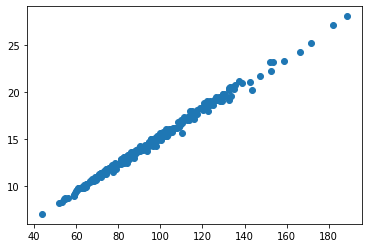

In [140]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


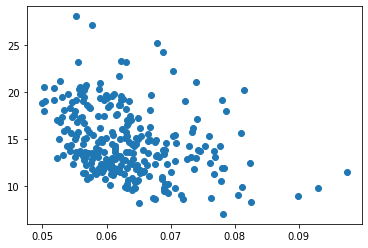

In [141]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.84 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [142]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn.fit(X_train,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(X_train,y_train['Diagnosis']))


Performance on X_test:  0.7470588235294118


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [143]:
# Make prediction on testSet
X_predictions = knn.predict(X_test)
y_predictions = knn.predict(y_test)
X_trainPredictions = knn.predict(X_train)
y_trainPredictions = knn.predict(y_train)


In [144]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_predictions[count])
  if X_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_trainPredictions[count])
  if X_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

In [145]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_predictions[count])
  if y_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)

for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_trainPredictions[count])
  if y_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)



Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predic

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose the features used to train this model by selecting features which appear to have a high influence on the diagnosis, in Naive Bayes the weights of the features have no bearing on the output.  The model below is performing accurately but perhaps it is overfitting which is why I included two Naive Bayes Models in this notebook, the only difference being the number of features.  

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [146]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE',	'Smoothness_SE',	'Compactness_SE',	'Concavity_SE','Concave_Points_SE',	'Symmetry_SE'	,'Fractal_Dimension_SE']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
XTrainDiagnosisPrediction = naive_bayes.predict(X_train[['Diagnosis']])
YTrainDiagnosisPrediction = naive_bayes.predict(y_train[['Diagnosis']])


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if actualValues[count] == XDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XTrainDiagnosisPrediction[count])
  if actualValues[count] == XTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

In [148]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)
correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', YTrainDiagnosisPrediction[count])
  if actualValues[count] == YTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predic

# Second Naive Bayes Model
As we can see the model below has worse performance than the model above, you may be asking why we've included this model, the reason why is that the above model seems to be trained a little too well on our training data and may not be able to predict values outside of our dataset too well.

In [149]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predic

In [151]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if XDiagnosisPrediction[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

Let's make some predictions based on features from randomly selected rows to test our model a bit further

In [152]:
# Should be benign line 236
print('Should be benign line 236 of dataset: ',naive_bayes.predict([[0.2152,0.8301,1.215,12.64]]))
# should be malignant
print('Should be malignant line 239 of dataset: ', naive_bayes.predict([[0.6874,1.041,5.144,83.5]]))
#should be malignant line 225
print('Should be malignant line 225 of dataset: ', naive_bayes.predict([[0.3473,0.9209,2.244,32.19]]))


Should be benign line 236 of dataset:  [0]
Should be malignant line 239 of dataset:  [0]
Should be malignant line 225 of dataset:  [0]


As we see above the model performs pretty well, not 100% perfect but good enough for classification as it predicted 2/3 or 66% of the diagnosis values for the given row

In [153]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  1.0
mean squared errors value:  13.339169290650567


In [154]:
y_test.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
430,1,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,0.2530,0.8749,3.466,24.190,0.006965,0.062130,0.07926,0.022340,0.01499,0.005784,16.35,27.57,125.40,832.7,0.14190,0.70900,0.9019,0.24750,0.2866,0.11550
411,0,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340,0.1967,1.3870,1.342,13.540,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.13690,0.14820,0.1067,0.07431,0.2998,0.07881
382,0,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.045600,0.04305,0.016670,0.02470,0.007358,12.57,28.71,87.36,488.4,0.08799,0.32140,0.2912,0.10920,0.2191,0.09349
548,0,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.3630,2.054,18.240,0.007440,0.011230,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.11990,0.09546,0.0935,0.03846,0.2552,0.07920
440,0,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.036130,0.1489,0.06640,0.2574,1.3760,2.806,18.150,0.008565,0.046380,0.06430,0.017680,0.01516,0.004976,12.36,26.87,90.14,476.4,0.13910,0.40820,0.4779,0.15550,0.2540,0.09532
